In this notebook, we present how to build predictive models on tabular datasets, with only numerical features.

In particular we will highlight:

the scikit-learn API: .fit(X, y)/.predict(X)/.score(X, y);

how to evaluate the generalization performance of a model with a train-test split.

## First model with scikit-learn

In [1]:
import pandas as pd

In [5]:
adult_census = pd.read_csv("../datasets/adult-census-numeric.csv")

In [3]:
adult_census.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,41,0,0,92,<=50K
1,48,0,0,40,<=50K
2,60,0,0,25,<=50K
3,37,0,0,45,<=50K
4,73,3273,0,40,<=50K


In [4]:
target_name = "class"
target = adult_census[target_name]
target # outcome or y

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
39068     <=50K
39069     <=50K
39070      >50K
39071     <=50K
39072      >50K
Name: class, Length: 39073, dtype: object

In [8]:
data = adult_census.drop(columns=[target_name])
data.head()
# data = features = X

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40


In [9]:
data.shape

(39073, 4)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier()
# _ in python is a placeholder for a variable that we don't use
_ = model.fit(data, target) 

In [17]:
_

KNeighborsClassifier()

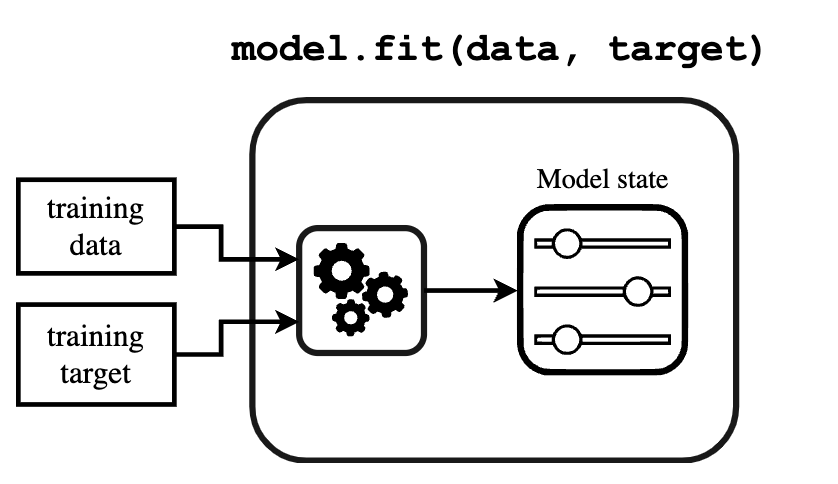

In [12]:
target_predicted = model.predict(data)

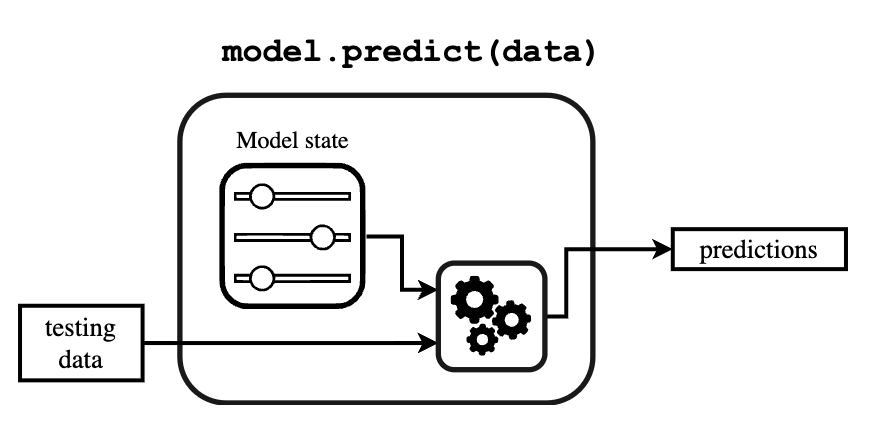

In [13]:
target_predicted[:5]

array([' >50K', ' <=50K', ' <=50K', ' <=50K', ' <=50K'], dtype=object)

In [14]:
target[:5]

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [15]:
target[:5] == target_predicted[:5]

0    False
1     True
2     True
3     True
4     True
Name: class, dtype: bool

In [16]:
(target == target_predicted).mean()

0.8219486602001382

### Train-test data split

In [18]:
adult_census_test = pd.read_csv(
    '../datasets/adult-census-numeric-test.csv')

In [19]:
adult_census_test.head()

,age,capital-gain,capital-loss,hours-per-week,class
0,20,0,0,35,<=50K
1,53,0,0,72,>50K
2,41,0,0,50,>50K
3,20,0,0,40,<=50K
4,25,0,0,40,<=50K


In [20]:
target_test = adult_census_test[target_name]
data_test = adult_census_test.drop(columns=[target_name])

In [21]:
target_test.head()

0     <=50K
1      >50K
2      >50K
3     <=50K
4     <=50K
Name: class, dtype: object

In [22]:
data_test.head()

,age,capital-gain,capital-loss,hours-per-week
0,20,0,0,35
1,53,0,0,72
2,41,0,0,50
3,20,0,0,40
4,25,0,0,40


In [23]:
data_test.shape

(9769, 4)

In [24]:
accuracy = model.score(data_test, target_test)

In [25]:
accuracy # number of correct predictions / total number of predictions

0.80202681953117

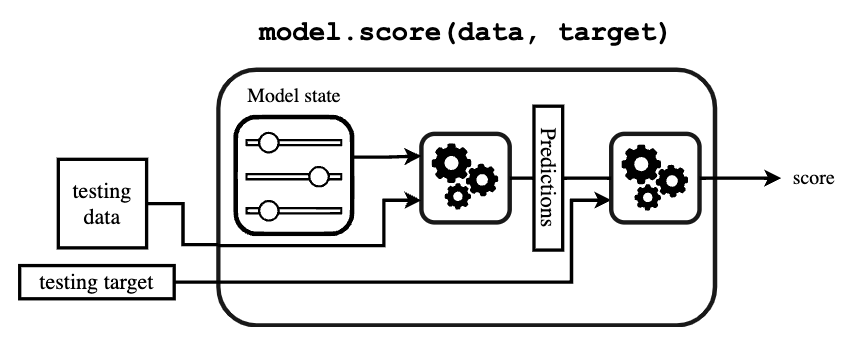

fitted a k-nearest neighbors model on a training dataset;

evaluated its generalization performance on the testing data;

introduced the scikit-learn API .fit(X, y) (to train a model), .predict(X) (to make predictions) and .score(X, y) (to evaluate a model).

#### 1. What is the default value of the n_neighbors parameter? 
Hint: Look at the documentation on the scikit-learn website or directly access the description inside your notebook by running the following cell. This will open a pager pointing to the documentation.
```python
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier?
```

#### 2. Create a KNeighborsClassifier model with n_neighbors=50
a. Fit this model on the data and target loaded above
b. Use your model to make predictions on the first 10 data points inside the data. Do they match the actual target values?
c. Compute the accuracy on the training data.
d. Now load the test data from "../datasets/adult-census-numeric-test.csv" and compute the accuracy on the test data.

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
KNeighborsClassifier?  # 5 is the default for n_neighbors

In [28]:
model = KNeighborsClassifier(n_neighbors=50)

In [29]:
model.fit(data, target)

KNeighborsClassifier(n_neighbors=50)

In [30]:
first_data_values = data[:10]

In [31]:
first_data_values

,age,capital-gain,capital-loss,hours-per-week
0,41,0,0,92
1,48,0,0,40
2,60,0,0,25
3,37,0,0,45
4,73,3273,0,40
5,57,0,0,72
6,22,0,0,35
7,55,27828,0,55
8,45,0,0,40
9,36,0,0,50


In [32]:
first_predictions = model.predict(first_data_values)

In [34]:
first_target_values = target[:10]

In [37]:
(first_predictions == first_target_values).mean()

0.9

In [38]:
model.score(data, target)

0.8290635477183733

In [39]:
model.score(data_test, target_test)

0.8194288054048521

#### No free-lunch theory
There is not one model or model with set of parameters that works best. Depending on the problem you have to find that model yourself.

#### Hyperparameter tuning
Looping over your hyperparameters (such as n_neighbours) to find the one that has the best test accuracy

## Working with numerical data
In the previous notebook, we trained a k-nearest neighbors model on some data.

However, we oversimplified the procedure by loading a dataset that contained exclusively numerical data. Besides, we used datasets which were already split into train-test sets.

In this notebook, we aim at:

identifying numerical data in a heterogeneous dataset;

selecting the subset of columns corresponding to numerical data;

using a scikit-learn helper to separate data into train-test sets;

training and evaluating a more complex scikit-learn model.

We will start by loading the adult census dataset used during the data exploration.



In [40]:
adult_census = pd.read_csv("../datasets/adult-census.csv")

In [41]:
# duplicate column: education-num and education
adult_census = adult_census.drop(columns="education-num")

In [42]:
adult_census.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [44]:
data = adult_census.drop(columns='class')
target = adult_census["class"]

In [45]:
data.head(2)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States


In [46]:
target.head(2)

0     <=50K
1     <=50K
Name: class, dtype: object

In [50]:
numerical_columns = ["age", "capital-gain",
                     "capital-loss", "hours-per-week"]

In [51]:
data_numeric = data[numerical_columns]

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
data_train, data_test, target_train, target_test =(
    train_test_split(data_numeric, target,
                 random_state=42,test_size=0.25))

In [58]:
data_numeric.shape

(48842, 4)

In [55]:
data_train.shape

(36631, 4)

In [56]:
target_train.shape

(36631,)

In [57]:
data_test.shape

(12211, 4)

### Logistic regression
if 0.1 * age + 3.3 * hours-per-week - 15.1 > 0, predict high-income

otherwise predict low-income

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
model = LogisticRegression()

In [61]:
model.fit(data_train, target_train)

LogisticRegression()

In [62]:
accuracy = model.score(data_test, target_test)
accuracy

0.8070592089099992

In [63]:
adult_census["class"].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [64]:
(target == " <=50K").mean() # majority class

0.7607182343065395

## Preprocessing for numerical features
In this part, we will still use only numerical features.

We will introduce these new aspects:

an example of preprocessing, namely scaling numerical variables;

using a scikit-learn pipeline to chain preprocessing and model training.

In [65]:
data_numeric.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


In [66]:
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()

In [68]:
scaler.fit(data_train)

StandardScaler()

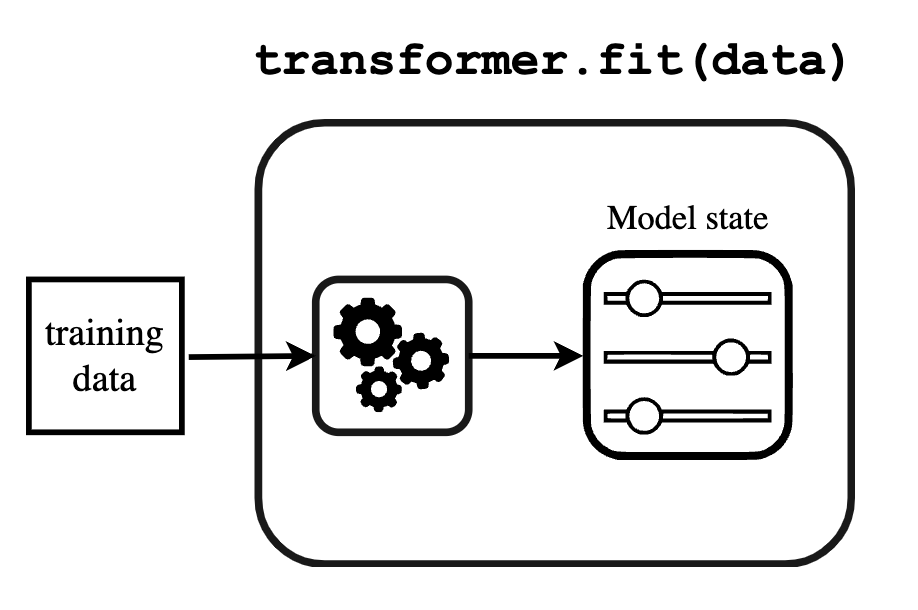

In [69]:
scaler.mean_

array([  38.64235211, 1087.07772106,   89.6653108 ,   40.43124676])

In [70]:
scaler.scale_ # Standard deviations

array([  13.72556083, 7522.59025606,  407.10461772,   12.42378265])

In [71]:
data_train_scaled = scaler.transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

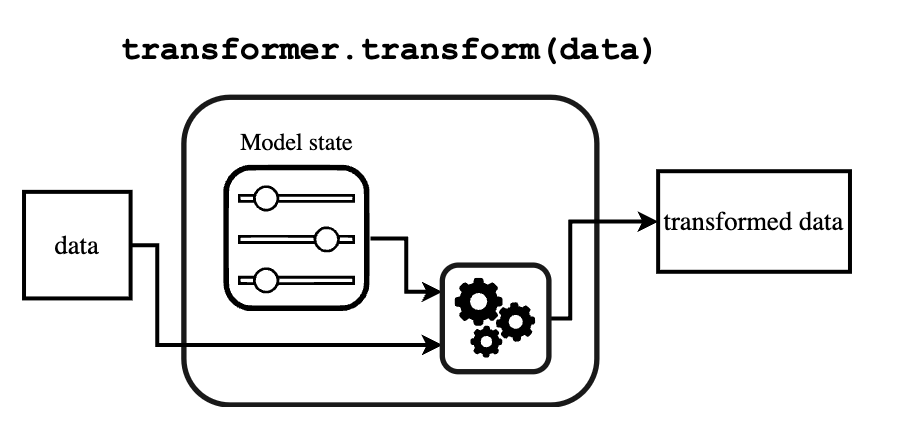

In [72]:
data_train_scaled = scaler.fit_transform(data_train)
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

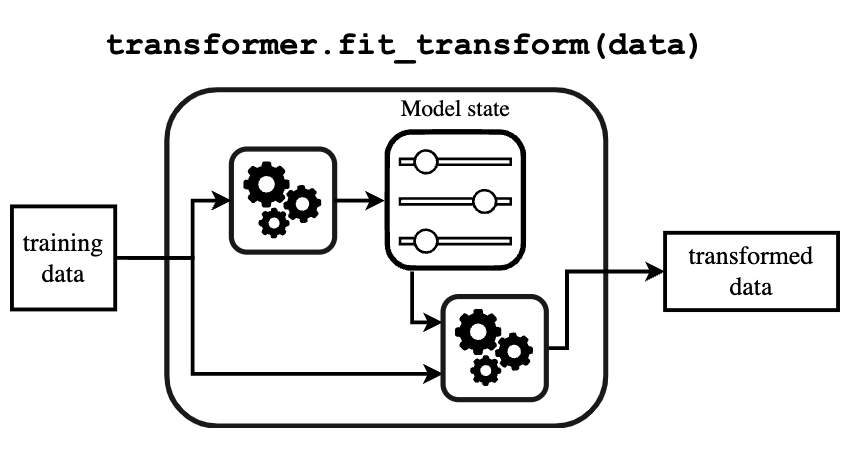

In [74]:
data_train_scaled

array([[ 0.17177061, -0.14450843,  5.71188483, -2.28845333],
       [ 0.02605707, -0.14450843, -0.22025127, -0.27618374],
       [-0.33822677, -0.14450843, -0.22025127,  0.77019645],
       ...,
       [-0.77536738, -0.14450843, -0.22025127, -0.03471139],
       [ 0.53605445, -0.14450843, -0.22025127, -0.03471139],
       [ 1.48319243, -0.14450843, -0.22025127, -2.69090725]])

In [73]:
data_train_scaled_df = pd.DataFrame(data_train_scaled,
                                    columns=data_train.columns)
data_train_scaled_df.describe()

,age,capital-gain,capital-loss,hours-per-week
count,3.663100e+04,3.663100e+04,3.663100e+04,3.663100e+04
mean,-2.273364e-16,3.530310e-17,3.840667e-17,1.844684e-16
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.576792e+00,-1.445084e-01,-2.202513e-01,-3.173852e+00
25%,-7.753674e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
50%,-1.196565e-01,-1.445084e-01,-2.202513e-01,-3.471139e-02
75%,6.817680e-01,-1.445084e-01,-2.202513e-01,3.677425e-01
max,3.741752e+00,1.314865e+01,1.047970e+01,4.714245e+00


In [75]:
from sklearn.pipeline import make_pipeline

In [76]:
model = make_pipeline(StandardScaler(), LogisticRegression())

In [77]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [78]:
import time

In [83]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [79]:
# pipeline with scaler
start = time.time()
model.fit(data_train, target_train)
elapsed_time = time.time() - start

In [80]:
elapsed_time

0.08033514022827148

In [81]:
model_without_scaling = LogisticRegression()
start = time.time()
model_without_scaling.fit(data_train, target_train)
elapsed_time = time.time() - start

In [82]:
elapsed_time

0.09939980506896973

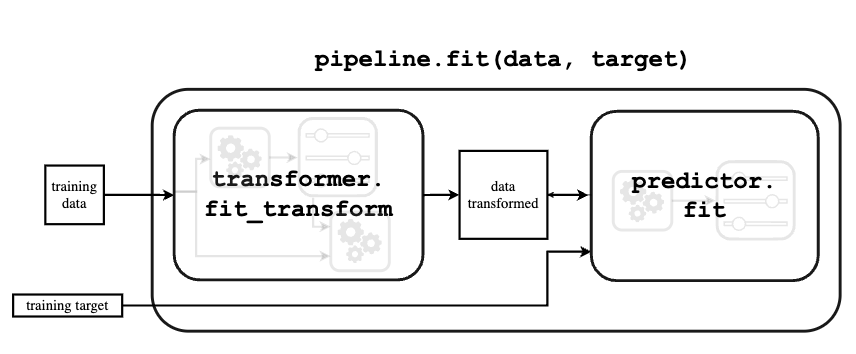

In [84]:
model

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [85]:
from sklearn.model_selection import cross_validate

In [86]:
cv_result = cross_validate(model, data_numeric, target, cv=5)

In [87]:
cv_result

{'fit_time': array([0.049963  , 0.04248905, 0.04265285, 0.04262209, 0.04250503]),
 'score_time': array([0.00978088, 0.00913692, 0.00933313, 0.00945497, 0.00928998]),
 'test_score': array([0.79557785, 0.80049135, 0.79965192, 0.79873055, 0.80436118])}

In [88]:
model.fit_transform(data_train, target_train)

AttributeError: 'LogisticRegression' object has no attribute 'transform'

### Exercise: Recap fitting a scikit-learn model on numerical data
#### 1. Why do we need two sets: a train set and a test set?

a) to train the model faster
b) to validate the model on unseen data
c) to improve the accuracy of the model

B

Select all answers that apply

#### 2. The generalization performance of a scikit-learn model can be evaluated by:

a) calling fit to train the model on the training set, predict on the test set to get the predictions, and compute the score by passing the predictions and the true target values to some metric function
b) calling fit to train the model on the training set and score to compute the score on the test set
c) calling cross_validate by passing the model, the data and the target
d) calling fit_transform on the data and then score to compute the score on the test set

A, B, C

Select all answers that apply

#### 3. When calling `cross_validate(estimator, X, y, cv=5)`, the following happens:

a) X and y are internally split five times with non-overlapping test sets
b) estimator.fit is called 5 times on the full X and y
c) estimator.fit is called 5 times, each time on a different training set
d) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the train sets
e) a Python dictionary is returned containing a key/value containing a NumPy array with 5 scores computed on the test sets

A, C, E
Select all answers that apply

#### 4. (optional) Scaling
We define a 2-dimensional dataset represented graphically as follows:
![](https://i.imgur.com/muvSbI6.png)

Question

If we process the dataset using a StandardScaler with the default parameters, which of the following results do you expect:

![](https://i.imgur.com/t5mTlVG.png)


a) Preprocessing A
b) Preprocessing B
c) Preprocessing C
d) Preprocessing D

Select a single answer

A

#### 5. (optional) Cross-validation allows us to:

a) train the model faster
b) measure the generalization performance of the model
c) reach better generalization performance
d) estimate the variability of the generalization score

D

Select all answers that apply

## Data imputation
fill in missing values. For example with the mean.